#  Exploratory Data Analysis

In [4]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [5]:
df = pd.read_csv('../data/clean_data.csv') #  Load cleaned data

df.columns = [x.lower() for x in df.columns] # column names in lower case

print('Data size',df.shape)

Data size (3817613, 23)


In [6]:
df.rename(columns = {'fatal':'class'}, inplace = True)

# Class distribution

In [12]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,3756304,98.394049
1,1,61309,1.605951


# Descriptive statistics

In [8]:
df.drop('class', axis =1).describe()

,c_year,c_hour,c_vehs,v_id,v_year,p_id,p_age,c_case
count,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06
mean,2.007373e+03,1.371886e+01,2.099251e+00,1.548594e+00,1.999937e+03,1.512814e+00,3.664816e+01,1.275838e+06
std,5.455213e+00,5.106257e+00,1.102796e+00,8.167865e-01,7.572315e+00,1.230836e+00,1.868770e+01,7.419594e+05
min,1.999000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.524000e+03
25%,2.003000e+03,1.000000e+01,2.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,2.200000e+01,6.370150e+05
50%,2.007000e+03,1.400000e+01,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.500000e+01,1.272317e+06
75%,2.012000e+03,1.700000e+01,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,5.000000e+01,1.914410e+06
max,2.017000e+03,2.300000e+01,7.700000e+01,7.700000e+01,2.018000e+03,9.300000e+01,9.900000e+01,2.570235e+06


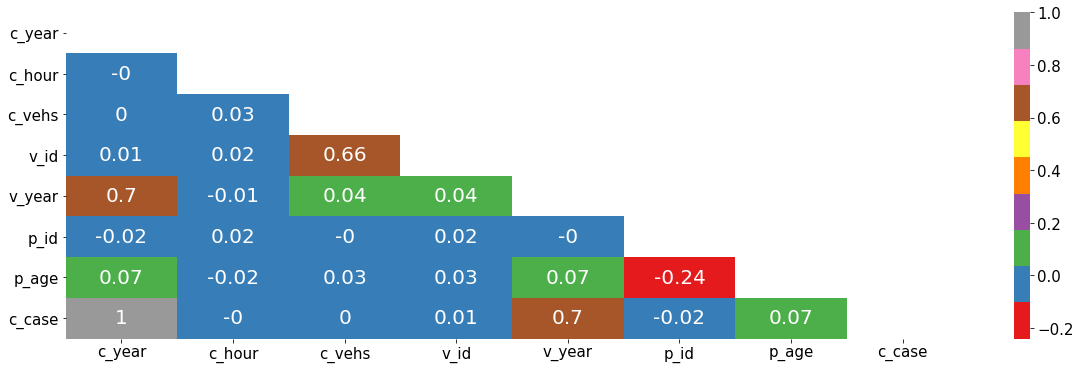

In [13]:
fig, ax = plt.subplots(figsize=(20,6))

# Correlation matrix
corr_matrix = df.drop('class', axis =1).corr()

# Plot
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_matrix, 2), annot=True, annot_kws={"size": 20},mask = mask, 
            cmap = plt.get_cmap("Set1"),ax = ax)
plt.show()

# Histogram

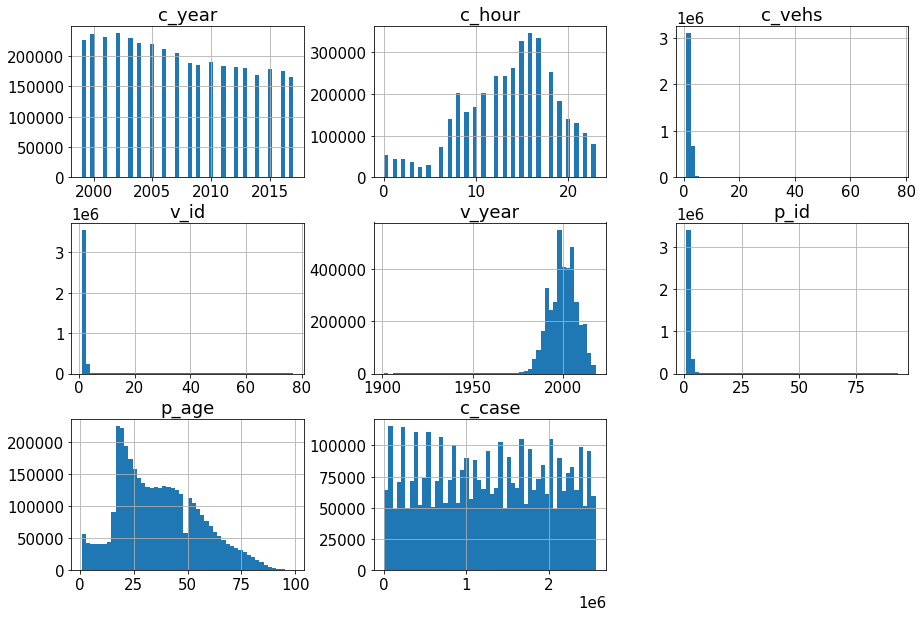

In [8]:
df.drop('class', axis =1).hist(bins = 50, figsize = (15,10))
plt.show()

# Fatality rate by collision hour

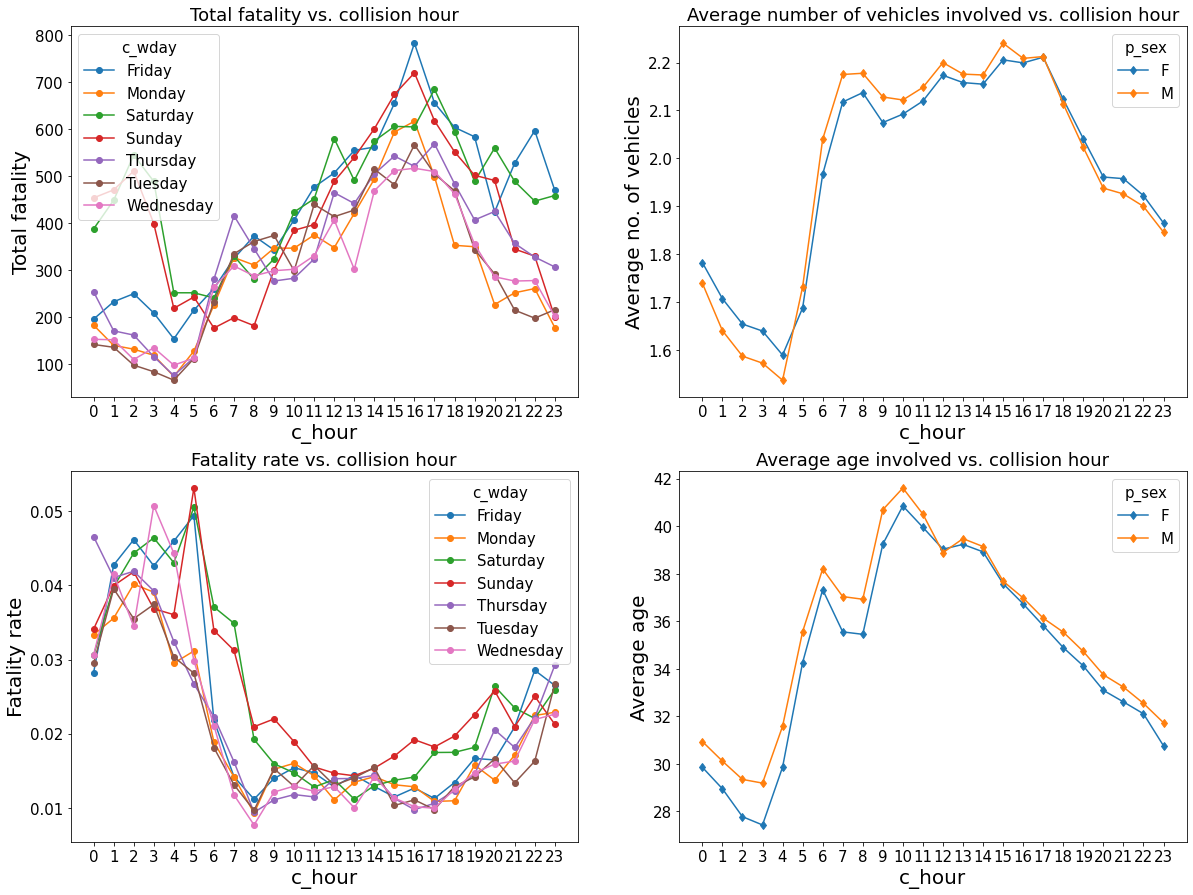

In [9]:
# set figure
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (20,15))

# pivot table
pivot_tab_hr1 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'sum')
pivot_tab_hr2 = df.pivot_table('c_vehs', index = 'c_hour', columns = 'p_sex', aggfunc = 'mean')
pivot_tab_hr3 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'mean')
pivot_tab_hr4 = df.pivot_table('p_age', index = 'c_hour', columns = 'p_sex', aggfunc = 'mean')

# plots
pivot_tab_hr1.plot(marker = 'o', ax = ax1)
pivot_tab_hr2.plot(marker = 'd', ax = ax2)
pivot_tab_hr3.plot(marker = 'o', ax = ax3)
pivot_tab_hr4.plot(marker = 'd', ax = ax4)

ax1.set_xlabel('c_hour', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_title('Total fatality vs. collision hour')
ax1.set_xticks(range(24))
ax2.set_xlabel('c_hour', fontsize = 20)
ax2.set_ylabel('Average no. of vehicles', fontsize = 20)
ax2.set_title('Average number of vehicles involved vs. collision hour')
ax2.set_xticks(range(24))
ax3.set_xlabel('c_hour', fontsize = 20)
ax3.set_ylabel('Fatality rate', fontsize = 20)
ax3.set_title('Fatality rate vs. collision hour')
ax3.set_xticks(range(24))
ax4.set_xlabel('c_hour', fontsize = 20)
ax4.set_ylabel('Average age', fontsize = 20)
ax4.set_title('Average age involved vs. collision hour')
ax4.set_xticks(range(24))

plt.savefig('../image/fig_h.png')

#   Fatality rate by gender
- Almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents. Therefore, the fatality rate is high for males than females.

In [10]:
pvt = df.pivot_table('c_case', index = 'p_sex', columns = 'class', aggfunc = 'count')
pvt['fatality rate'] = [np.around(pvt.values[0][1]/pvt.values[0][0],4),
                        np.around(pvt.values[1][1]/pvt.values[1][0],4)]
pvt

class,0,1,fatality rate
p_sex,,,
F,1744035,20795,0.0119
M,2012269,40514,0.0201


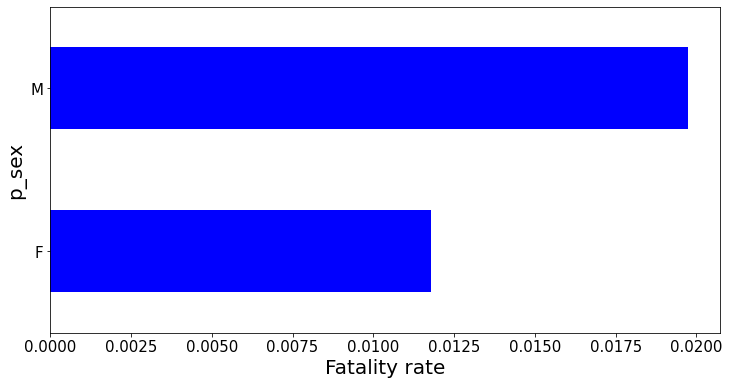

In [11]:
df.groupby('p_sex')['class'].mean().plot(kind = 'barh', figsize=(12,6), color = 'b')
plt.ylabel('p_sex', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 
plt.savefig('../image/fig2.pdf')

#  Age group are involved in fatal collision

- Young people in their 20s (mostly males) are involved in most fatal collisions
-  Fatality rate is increases in older people

In [12]:
df.pivot_table('p_age', index = 'p_sex', columns = 'class', aggfunc = 'mean')

class,0,1
p_sex,,
F,36.490061,39.067853
M,36.727187,38.287308


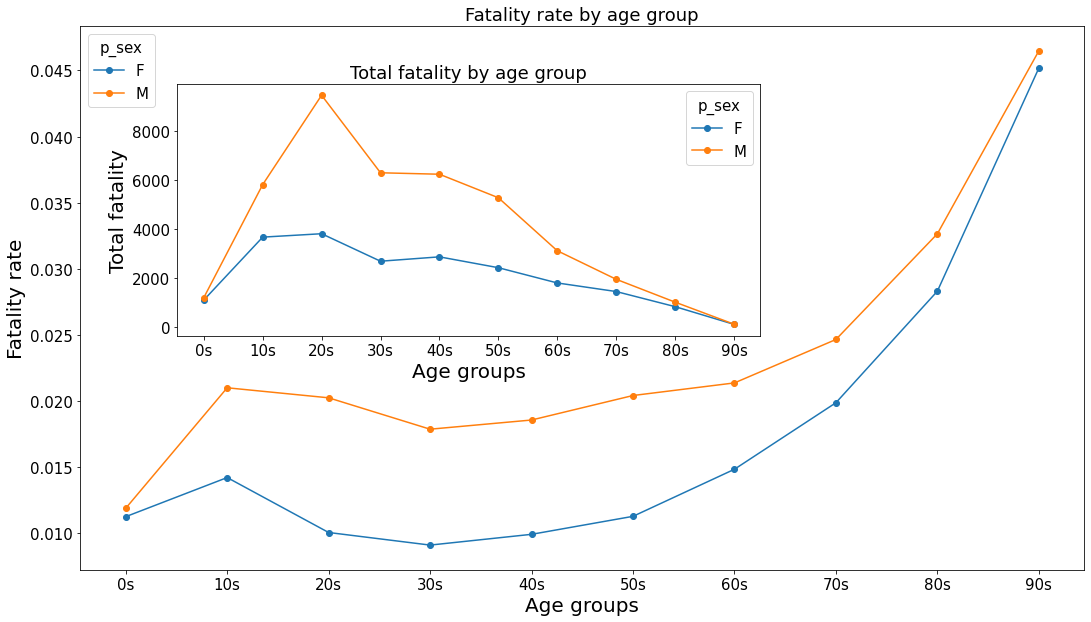

In [116]:
# Add age group
df['p_age_decade'] = (df['p_age']//10)*10

# pivot table
pivot_tab_age1 =df.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'sum')
pivot_tab_age2 = df.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'mean')

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']

# plots
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.45,0.45,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

pivot_tab_age2.plot(marker = 'o', ax = ax1)
pivot_tab_age1.plot(marker = 'o', ax = ax2)
ax1.set_xlabel('Age groups', fontsize = 20)
ax1.set_ylabel('Fatality rate', fontsize = 20)
ax1.set_title('Fatality rate by age group')
ax1.set_xticks(list(pivot_tab_age1.index))
ax1.set_xticklabels(labels)
ax2.set_xlabel('Age groups', fontsize = 20)
ax2.set_ylabel('Total fatality', fontsize = 20)
ax2.set_title('Total fatality by age group')
ax2.set_xticks(list(pivot_tab_age1.index))
ax2.set_xticklabels(labels)
plt.savefig('../image/fig3a.png')

# Age distribution among fatal collision

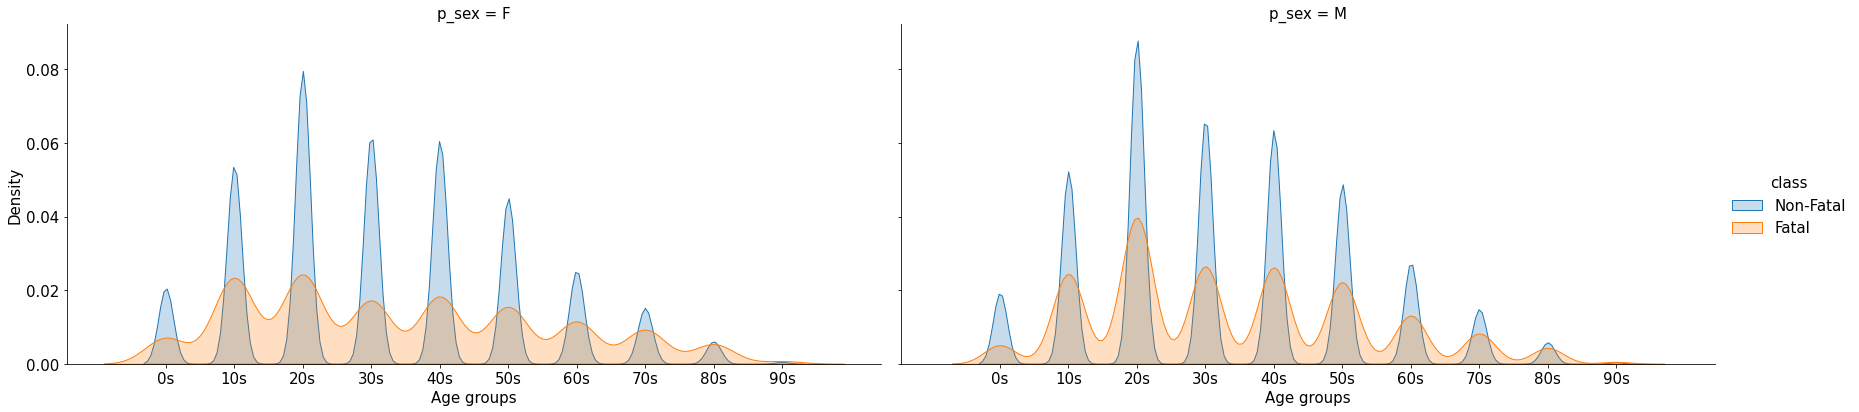

In [117]:
# Create dataframe
age_df = df[['p_sex','p_age_decade', 'class']]
age_df['class'] =  age_df['class'].map({1:'Fatal', 0:'Non-Fatal'})

# Plot
g = sns.FacetGrid(data = age_df.dropna(), hue = 'class',col = 'p_sex',aspect=2, height = 6)
(g.map(sns.kdeplot, 'p_age_decade', shade = True)\
    .set_axis_labels("Age groups","Density")\
        .add_legend()
        )

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']
plt.xticks(np.arange(0,100,10),labels)
plt.savefig('../image/fig3b.png')
plt.show()

#  Vehicle model year was involved in most fatal collisions
-  The 2000s vehicle models caused the most fatal collisions and they were driven mostly by mostly males.

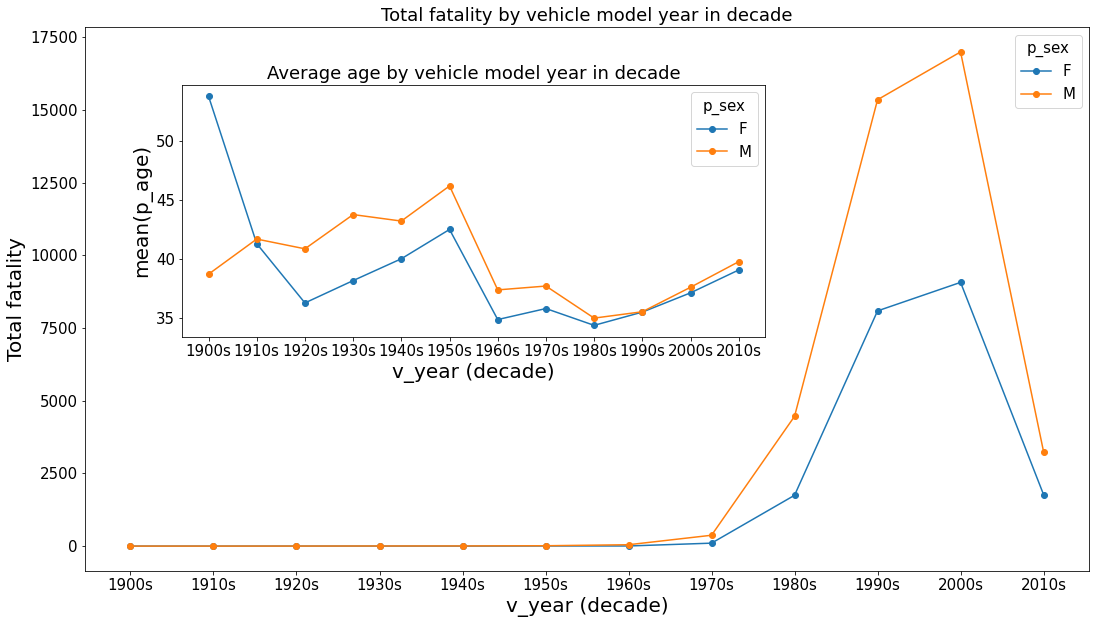

In [112]:
# Create dataframe
cols = ['v_year', 'p_sex', 'p_age', 'class']
df_v_year = df[cols]
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10

# pivot table
pivot_tab_vyr = df_v_year.pivot_table('class', index = 'v_year_decade', columns = 'p_sex', aggfunc = 'sum')
pivot_tab_vyr_ = df_v_year.pivot_table('p_age', index = 'v_year_decade', columns = 'p_sex', aggfunc = 'mean')

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'
        ]
# plots
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.45,0.45,0.35]
ax2 = fig.add_axes([left, bottom, width, height])


pivot_tab_vyr.plot(marker = 'o', ax = ax1)
pivot_tab_vyr_.plot(marker = 'o', ax = ax2)
ax1.set_xlabel('v_year (decade)', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_xticks(np.arange(1900,2020,10))
ax1.set_xticklabels(labels)
ax1.set_title('Total fatality by vehicle model year in decade')
ax2.set_xlabel('v_year (decade)', fontsize = 20)
ax2.set_ylabel('mean(p_age)', fontsize = 20)
ax2.set_xticks(np.arange(1900,2020,10))
ax2.set_xticklabels(labels)
ax2.set_title('Average age by vehicle model year in decade')
plt.savefig('../image/fig5.png')

# Collision distribution of vehicle model year by gender
- The new vehicle models from 2005 to present seem to be involved in mostly non-fatal collisions.

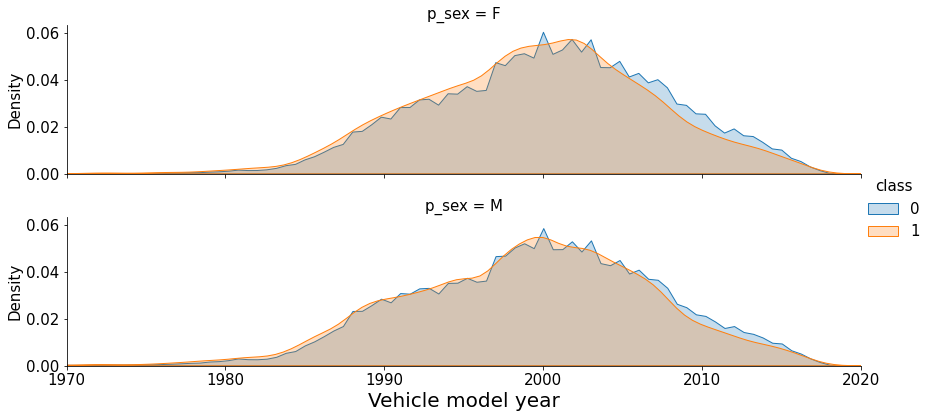

In [17]:
g = sns.FacetGrid(data = df.dropna(), hue = 'class',row = 'p_sex', aspect =4)  
(g.map(sns.kdeplot, 'v_year', shade = True).set_axis_labels("Vehicle model year","Density").add_legend())

plt.xlim([1970,2020])
plt.xlabel("Vehicle model year", fontsize = 20)
#plt.legend(title = 'Fatality', fontsize = 20)
plt.savefig('../image/fig7.pdf')

#  Fatality rate of males and  females each year

- Most vehicle collisions occur  in the year 2006, 2005, and 1999 respectively.

- More males got involved in a vehicle collision than females

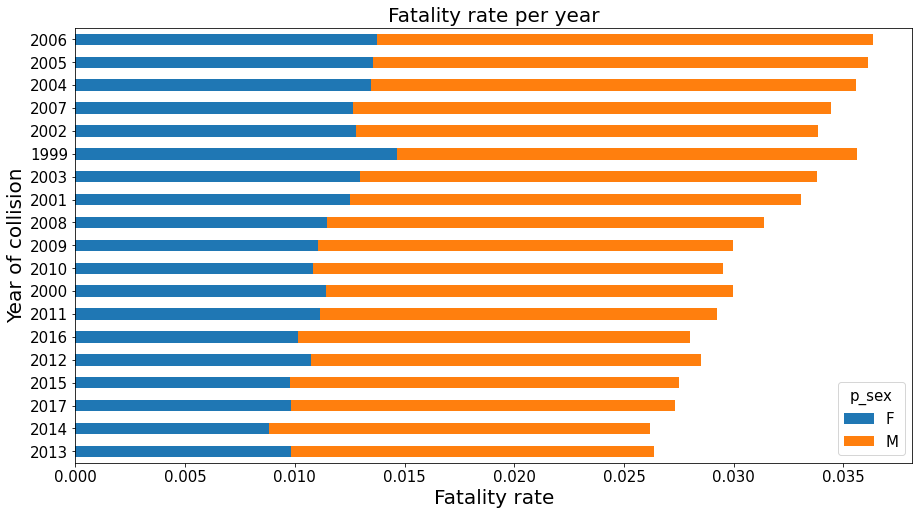

In [18]:
#  Plot figure
table_year = df.pivot_table('class', index = 'c_year', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
plt.ylabel('Year of collision', fontsize = 20)
plt.title('Fatality rate per year', fontsize = 20)
plt.savefig('../image/fig1.png')

# Fatality rate by person position

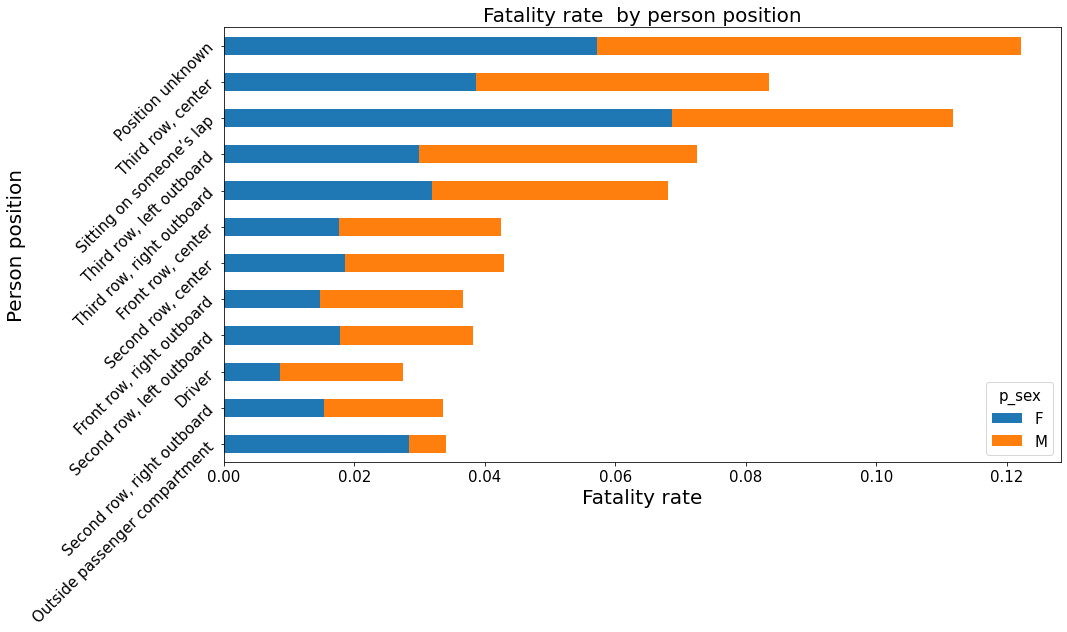

In [30]:
#  Plot figure
table_year = df.pivot_table('class', index = 'p_psn', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by person position', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_p.png')

# Vechicle types with the most fatal collisions
- Most fatal accident are caused by road tractor

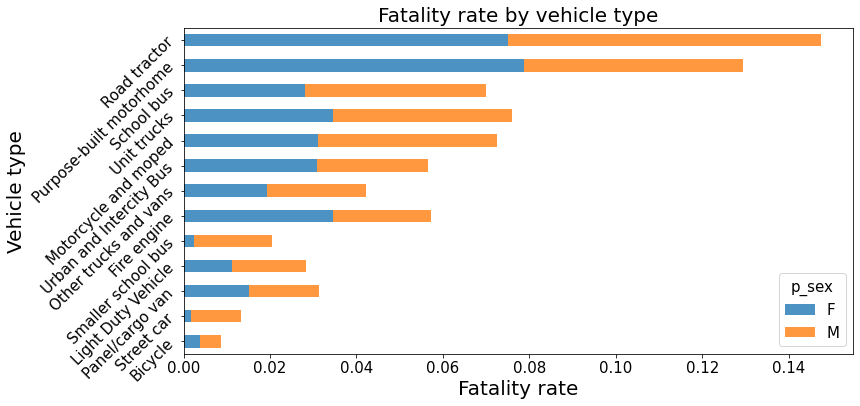

In [29]:
# Plot figure
table_vtype = df.pivot_table('class', index = 'v_type', columns = 'p_sex', aggfunc = 'mean')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(loc= 'lower right', title = 'p_sex')
plt.title('Fatality rate by vehicle type', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig6.pdf')

#  Fatality rate per month
- Fatal accidents are mostly likely in July and August, i.e. during the summer season. They also occur mostly on weekends

In [16]:
month_dict = {'January':1, 'February':2, 'March':3, 'April':4,  'May':5, 'June':6, 'July':7,'August':8, 'September':9,'october':10, 'November':11, 'December':12}

df['c_mnth'].replace(month_dict, inplace = True)

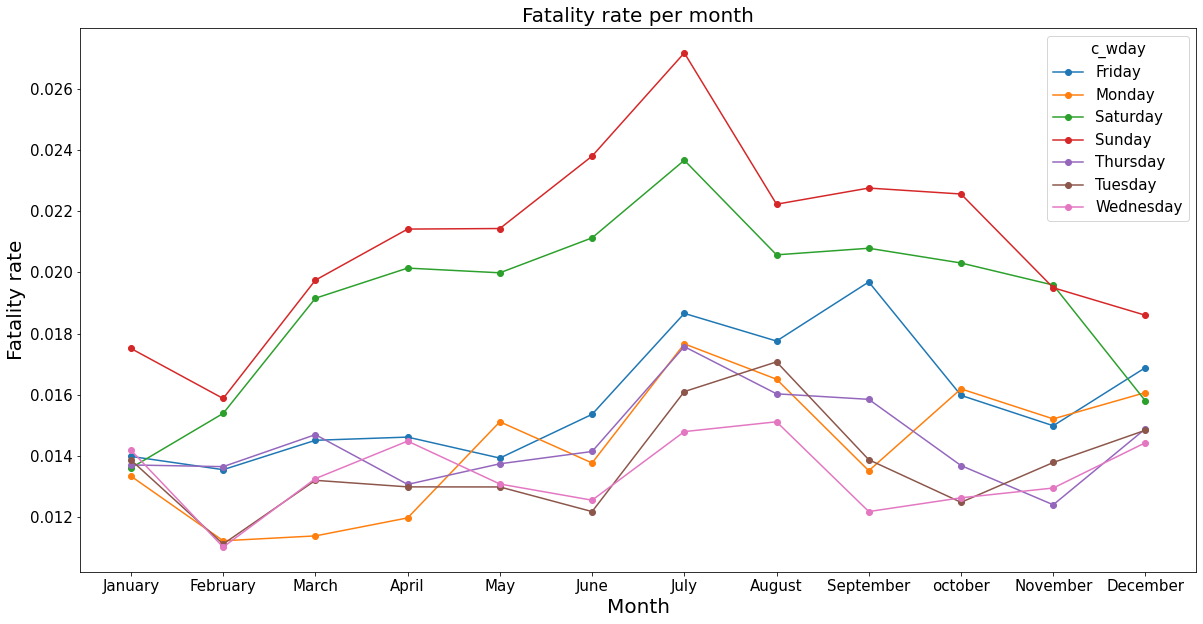

In [56]:
table_month = df.pivot_table('class', index = 'c_mnth', columns = 'c_wday', aggfunc = 'mean')

# Plot figure
labels = ['January', 'February', 'March', 'April',  'May', 'June', 
          'July','August', 'September','october', 'November', 'December'
            ]
table_month.plot(marker = 'o',  figsize = (20,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month', fontsize =20)
plt.xticks(list(table_month.index), labels)
plt.savefig('../image/fig9a.png')
plt.show()

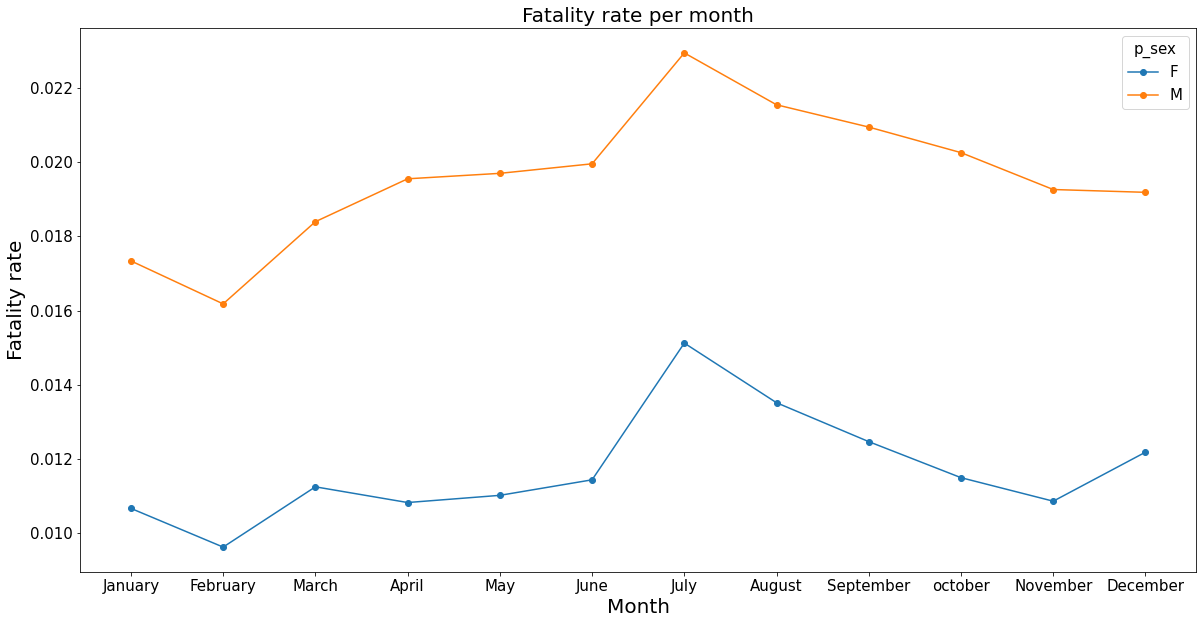

In [57]:
table_month = df.pivot_table('class', index = 'c_mnth', columns = 'p_sex', aggfunc = 'mean')

# Plot figure
labels = ['January', 'February', 'March', 'April',  'May', 'June', 
          'July','August', 'September','october', 'November', 'December'
            ]
table_month.plot(marker = 'o',  figsize = (20,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month', fontsize =20)
plt.xticks(list(table_month.index), labels)
plt.savefig('../image/fig9b.png')
plt.show()

#  Fatality rate by weather condition
- The fatal collisions occur mostly due to visibility limitation

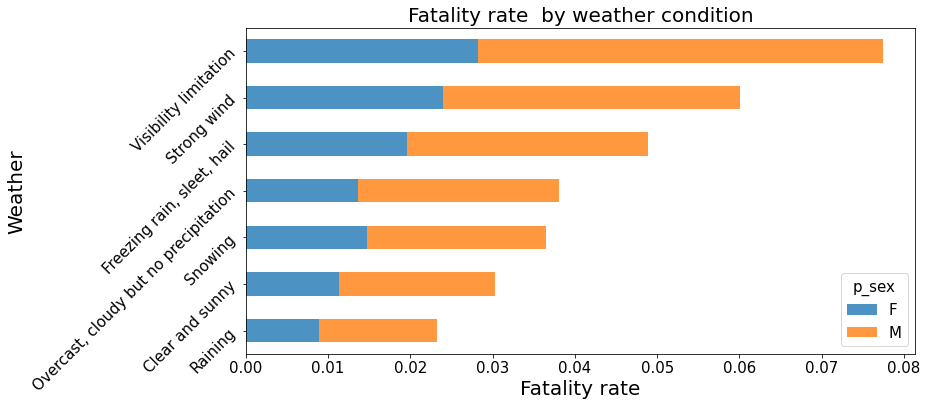

In [27]:
# Plot figure
table_weather = df.pivot_table('class', index = 'c_wthr', columns = 'p_sex', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig10.pdf')

#  Fatality rate by road configuration
- Most fatal accidents occur at passing or climbing lane

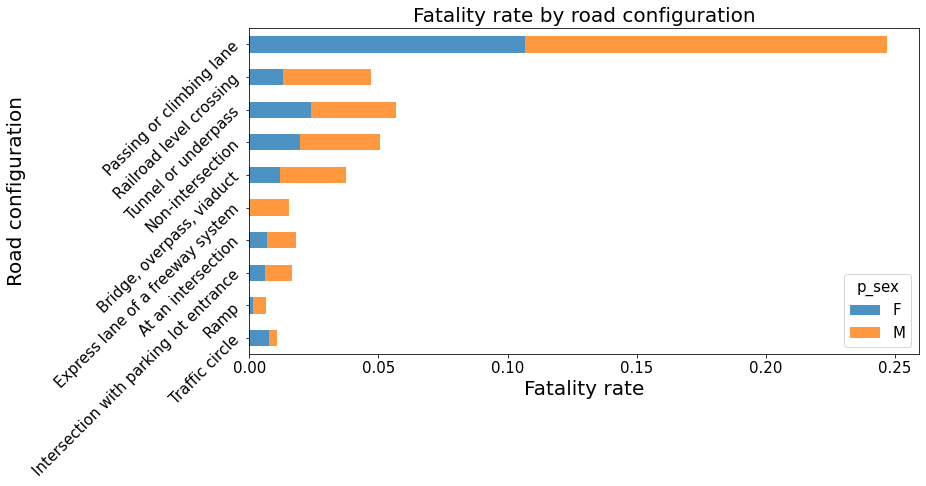

In [26]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_rcfg', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig11.pdf')

#  Fatality rate by Road alignment
- Most fatal accidents occur by curved and gradient road alignment

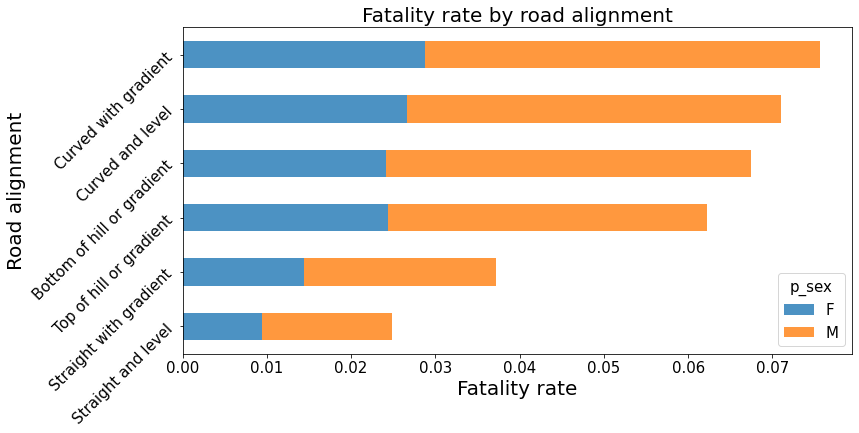

In [25]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_raln', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road alignment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road alignment', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig13.pdf')